In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Loading**

In [9]:
train = pd.read_csv("j0001_train.csv")
test = pd.read_csv("j0001_X_test.csv")

In [10]:
train.head()

,feature1,feature2,feature3,feature4,target
0,0.885598,-0.058136,-0.502394,-0.072880,4.999557
1,1.391696,0.350938,0.311445,-0.780685,56.613234
2,-0.599735,-0.072272,1.541158,-0.384914,43.374539
3,1.108150,1.924439,-0.068485,1.985521,50.226308
4,-0.724598,-1.485027,-1.755203,-0.254649,-107.187888


# **2. Exploratory Data Analysis**

In [11]:
train.describe()

,feature1,feature2,feature3,feature4,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.027414,0.001468,-0.013670,-0.016315,-1.325515
std,0.986569,0.993519,1.003757,1.008821,49.995929
min,-3.193735,-3.986392,-2.987483,-3.254383,-153.822702
25%,-0.705434,-0.637161,-0.704697,-0.714512,-36.070943
50%,-0.030567,0.030049,-0.022917,-0.021288,-1.646837
75%,0.670686,0.665407,0.673575,0.693128,32.707651
max,3.277599,3.190221,3.207883,3.281604,170.703958


In [21]:
test.describe()

,feature1,feature2,feature3,feature4
count,900.000000,900.000000,900.000000,900.000000
mean,0.024461,0.002419,-0.020012,0.051879
std,0.985879,0.982254,0.985326,0.987839
min,-3.134039,-3.358168,-3.420008,-3.212021
25%,-0.676533,-0.618076,-0.719525,-0.633097
50%,0.042562,0.029166,-0.063487,0.042664
75%,0.672469,0.651246,0.622469,0.729335
max,2.868569,3.177002,3.796819,3.567152


In [38]:
def boxplot(data, color='b'):
    for feature in data.columns:
        sns.set(color_codes=True)
        sns.boxplot(x = data[feature], color = color)
        plt.show()
        
def kdeplot(data, color='b'):
    for feature in data.columns:
        sns.set(color_codes=True)
        sns.kdeplot(data[feature], shade=True, color=color)
        plt.axvline(data[feature].mean(), 0, 1)
        plt.axvline(data[feature].median(), 0, 1, color='r')
        plt.show()

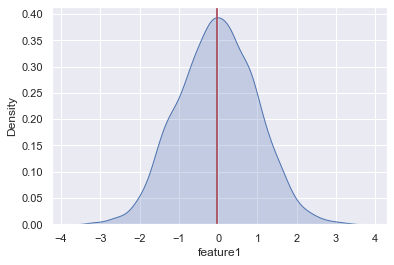

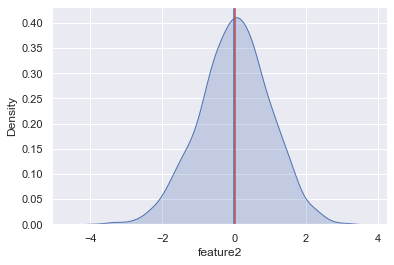

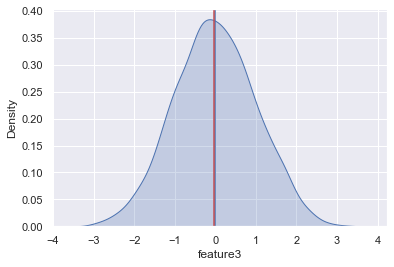

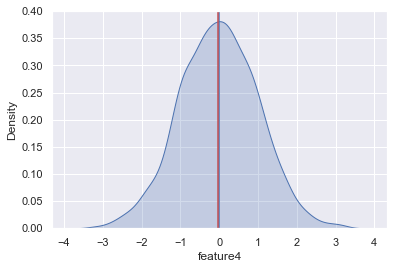

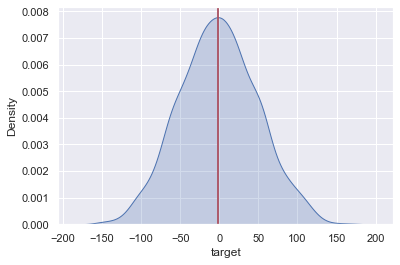

In [34]:
kdeplot(train)

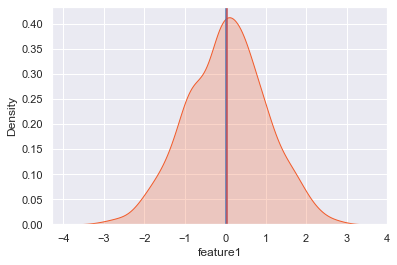

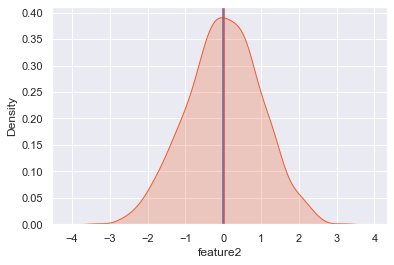

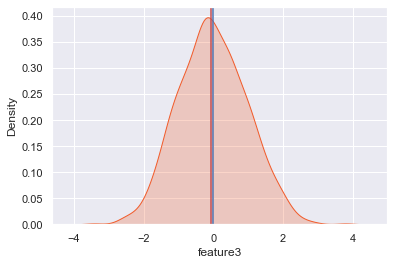

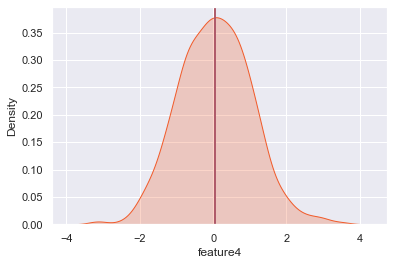

In [35]:
kdeplot(data=test, color="#F15B2A")

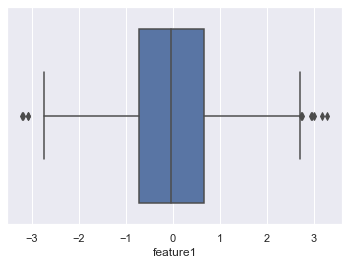

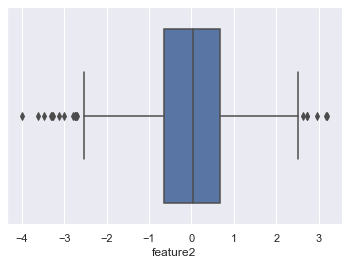

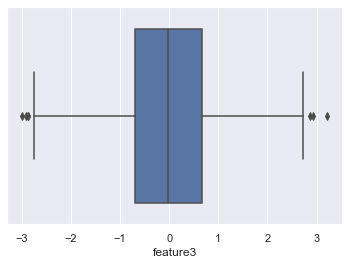

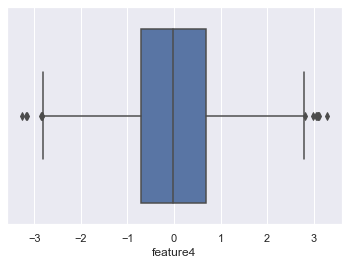

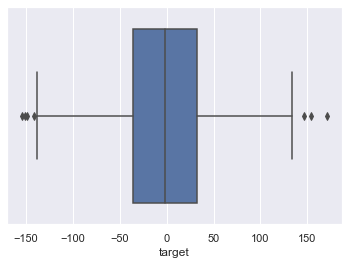

In [39]:
boxplot(data=train)

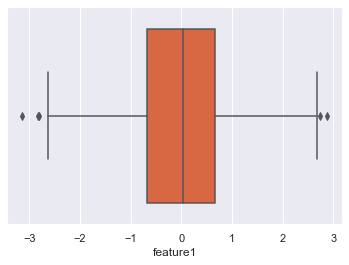

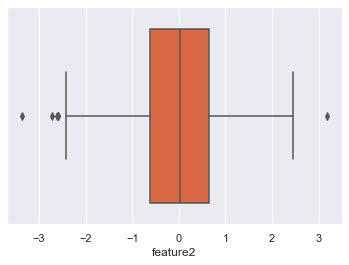

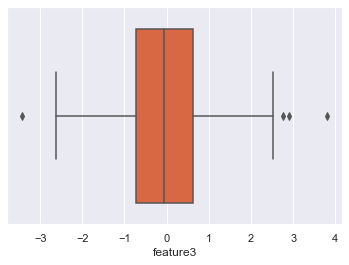

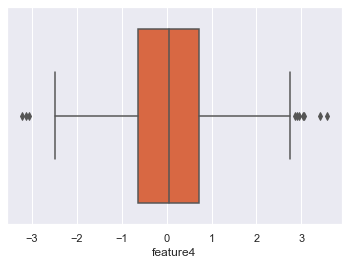

In [40]:
boxplot(data=test, color="#F15B2A")

<AxesSubplot:xlabel='feature1'>

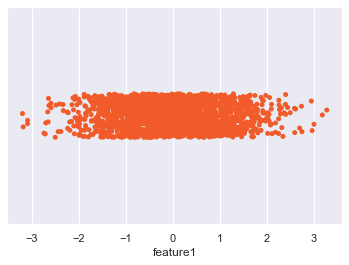

In [42]:
sns.stripplot(x=train['feature1'],
                 color='#F15B2A',
                 jitter=1)

<AxesSubplot:>

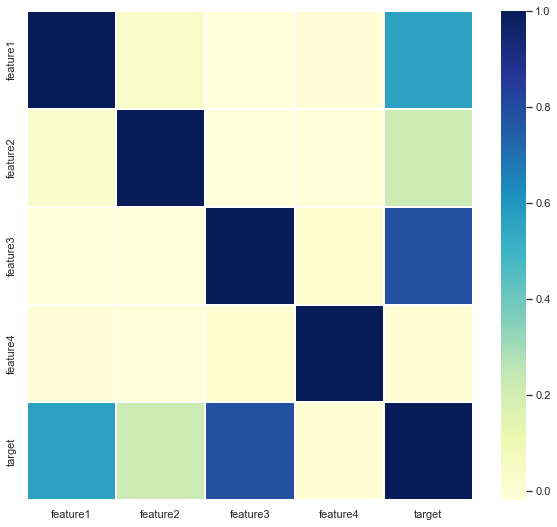

In [45]:
corrmat = train.corr()

f, ax = plt.subplots(figsize=(10, 9))

sns.heatmap(corrmat, ax=ax, cmap='YlGnBu', linewidth=0.1)

/Users/andreea/miniconda3/envs/nuwe_ch1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


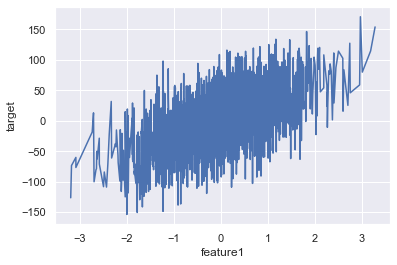

In [51]:
ax = sns.lineplot('feature1', y='target', data=train, palette=["#F15B2A"])

/Users/andreea/miniconda3/envs/nuwe_ch1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


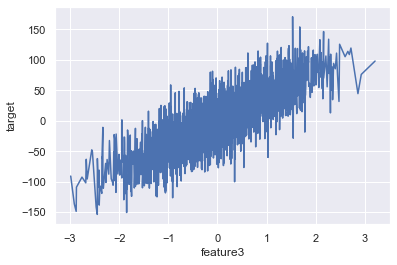

In [52]:
ax = sns.lineplot('feature3', y='target', data=train, palette=["#F15B2A"])

/Users/andreea/miniconda3/envs/nuwe_ch1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


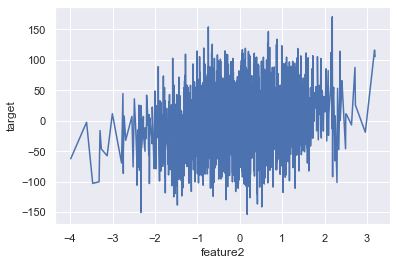

In [53]:
ax = sns.lineplot('feature2', y='target', data=train, palette=["#F15B2A"])

/Users/andreea/miniconda3/envs/nuwe_ch1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


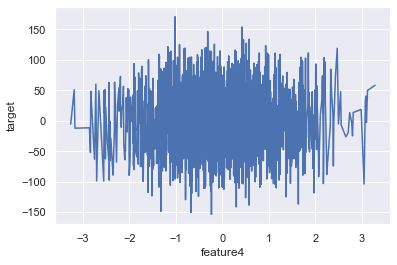

In [54]:
ax = sns.lineplot('feature4', y='target', data=train, palette=["#F15B2A"])

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   target    2100 non-null   float64
dtypes: float64(5)
memory usage: 82.2 KB


In [70]:
from sklearn.linear_model import LinearRegression

In [104]:
model = LinearRegression()

model.fit(train['feature3'].values.reshape((-1, 1)), y=train['target'])

LinearRegression()

In [105]:
r_sq = model.score(train['feature3'].values.reshape((-1, 1)), train['target'])
r_sq

0.6184768282079278

In [89]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.5422999961077046
slope: [28.56966018]


In [90]:
y_pred = model.predict(test)
print('predicted response:', y_pred, sep='\n')

/Users/andreea/miniconda3/envs/nuwe_ch1/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but LinearRegression is expecting 1 features as input.